## Data Akun Dicoding

Username : Annisa Rosdiyana

Email : annisarosdiyana17@gmail.com

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/gunting_batu_kertass.zip

--2021-07-05 13:34:26--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/gunting_batu_kertass.zip’

/tmp/gunting_batu_k 100%[===================>] 307.92M  4.14MB/s    in 77s     

2021-07-05 13:35:44 (4.00 MB/s) - ‘/tmp/gunting_batu_kertass.zip’ saved [322873683/322873683]



In [ ]:
import os
import random
import pandas as pd
import numpy as np
from shutil import copyfile

# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/gunting_batu_kertass.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

data_dir='/tmp/rockpaperscissors/rps-cv-images'
print(len(os.listdir(data_dir+'/rock/')))
print(len(os.listdir(data_dir+'/paper/')))
print(len(os.listdir(data_dir+'/scissors/')))

726
712
750


In [ ]:
print(os.listdir(data_dir))

['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt']


In [ ]:
classes=os.listdir(data_dir)

In [ ]:
classes.remove('README_rpc-cv-images.txt')

In [ ]:
classes

['paper', 'scissors', 'rock']

In [ ]:
source_path=[f'/tmp/rockpaperscissors/rps-cv-images/{a}' for a in classes]
print(source_path)

['/tmp/rockpaperscissors/rps-cv-images/paper', '/tmp/rockpaperscissors/rps-cv-images/scissors', '/tmp/rockpaperscissors/rps-cv-images/rock']


In [ ]:
classes_dir=[f'{a}_dir' for a in classes]
classes_dir

['paper_dir', 'scissors_dir', 'rock_dir']

In [ ]:
for cl_dir,cl_path in zip(classes_dir,source_path):
    print(cl_dir,': ',len(os.listdir(cl_path)))

paper_dir :  712
scissors_dir :  750
rock_dir :  726


In [ ]:
!pwd

/content


In [ ]:
try:
    os.mkdir('/content/training')
    os.mkdir('/content/validation')
except OSError:
    pass

In [ ]:
TRAINING_PATH='/content/training'
VALIDATION_PATH='/content/validation'
training_dir_path=[f'/content/training/{a}' for a in classes]
print('\n',training_dir_path)
validation_dir_path=[f'/content/validation/{a}' for a in classes]
print('\n',validation_dir_path)


 ['/content/training/paper', '/content/training/scissors', '/content/training/rock']

 ['/content/validation/paper', '/content/validation/scissors', '/content/validation/rock']


In [ ]:
for train_dir_path in training_dir_path:
    try:
        os.mkdir(train_dir_path)
    except OSError:
        pass

In [ ]:
for val_dir_path in validation_dir_path:
    try:
        os.mkdir(val_dir_path)
    except OSError:
        pass

In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    print('Split Data')
    for filename in os.listdir(SOURCE):
        file = SOURCE +'/'+ filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int( len(files)* SPLIT_SIZE)
    validation_length = int(len(files) - training_length)
    
    print('SOURCE: ',SOURCE, '\n TRAINING', TRAINING, '\n VALIDATION',VALIDATION, '\n ',len(files))
    print('training_length:',training_length)
    print('validation_length:',validation_length)
    
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    validation_set = shuffled_set[training_length:(training_length+validation_length)]

    print(len(training_set))
    print(len(validation_set))
    
    for filename in training_set:
        this_file = SOURCE +'/'+ filename
        destination = TRAINING +'/'+ filename
        copyfile(this_file, destination)
    

    for filename in validation_set:
        this_file = SOURCE +'/'+ filename
        destination = VALIDATION+'/' + filename
        copyfile(this_file, destination)

In [ ]:
split_size = .6
for source,train_dir_path,val_dir_path in zip(source_path,\
                                training_dir_path,validation_dir_path):
    #print('source: ',source,'\n', train_dir_path,'\n',val_dir_path,'\n')
    split_data(source,train_dir_path,val_dir_path, split_size)
    print('Splitting \n')

Split Data
SOURCE:  /tmp/rockpaperscissors/rps-cv-images/paper 
 TRAINING /content/training/paper 
 VALIDATION /content/validation/paper 
  712
training_length: 427
validation_length: 285
427
285
Splitting 

Split Data
SOURCE:  /tmp/rockpaperscissors/rps-cv-images/scissors 
 TRAINING /content/training/scissors 
 VALIDATION /content/validation/scissors 
  750
training_length: 450
validation_length: 300
450
300
Splitting 

Split Data
SOURCE:  /tmp/rockpaperscissors/rps-cv-images/rock 
 TRAINING /content/training/rock 
 VALIDATION /content/validation/rock 
  726
training_length: 435
validation_length: 291
435
291
Splitting 



In [ ]:
# membuat sebuah objek ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode='nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode='nearest')

In [39]:
# menggunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari oleh model
train_generator = train_datagen.flow_from_directory(
        '/content/training',  # direktori data
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        class_mode = 'sparse',
        seed=42)
 
validation_generator = test_datagen.flow_from_directory(
        '/content/validation', # direktori data
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        class_mode = 'sparse',
        seed=42)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [40]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 512)      

In [42]:
# compile model dengan 'Adamax' optimizer loss function 'sparse_categorical_crossentropy' 
model.compile(loss= "sparse_categorical_crossentropy",
              optimizer=tf.optimizers.Adamax(),
              metrics=['accuracy'])

In [43]:
# latih model dengan model.fit
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=10  # berapa batch yang akan dieksekusi pada setiap epoch
      )

Epoch 1/25
25/25 [==============================] - 13s 485ms/step - loss: 1.1258 - accuracy: 0.3300 - val_loss: 1.0996 - val_accuracy: 0.2750
Epoch 2/25
25/25 [==============================] - 12s 471ms/step - loss: 1.0990 - accuracy: 0.3900 - val_loss: 1.0887 - val_accuracy: 0.4000
Epoch 3/25
25/25 [==============================] - 12s 474ms/step - loss: 1.1029 - accuracy: 0.3700 - val_loss: 1.0909 - val_accuracy: 0.5000
Epoch 4/25
25/25 [==============================] - 12s 474ms/step - loss: 1.0852 - accuracy: 0.5000 - val_loss: 1.0763 - val_accuracy: 0.3500
Epoch 5/25
25/25 [==============================] - 12s 475ms/step - loss: 1.0464 - accuracy: 0.4700 - val_loss: 0.9575 - val_accuracy: 0.4500
Epoch 6/25
25/25 [==============================] - 12s 474ms/step - loss: 0.7079 - accuracy: 0.7500 - val_loss: 0.8464 - val_accuracy: 0.6000
Epoch 7/25
25/25 [==============================] - 12s 472ms/step - loss: 0.6066 - accuracy: 0.7600 - val_loss: 0.5113 - val_accuracy: 0.7750

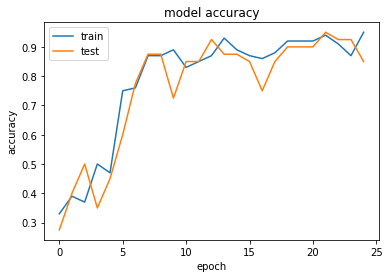

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

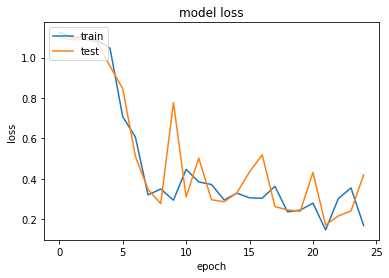

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving kertas.jpg to kertas.jpg
paper


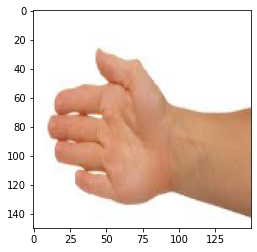

In [46]:
# melihat hasil dari model yang telah
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  if classes.sum()==1.0:
    print('paper')
  elif classes.sum()>=2:
    print('rock')
  else:
    print('scissors')